In [1]:
import openpharmacophore as oph

# Aromatic interactions

In this notebook we explore aromatic interactions between proteins and ligands 

In [2]:
pdb_path = "../../data/1xdn.pdb"

In [3]:
protein = oph.load(pdb_path)
print(f"Has hydrogens: {protein.has_hydrogens()}")
print(f"Has ligand: {protein.has_ligands()}")

Has hydrogens: False
Has ligand: True


In [4]:
lig_ids = protein.ligand_ids()
print(lig_ids)

['ATP:B']


In [5]:
smiles = oph.smiles_from_pdb_id(lig_ids[0])
smiles

'c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3)CO[P@@](=O)(O)O[P@](=O)(O)OP(=O)(O)O)O)O)N'

[13:44:07] WARNING: More than one matching pattern found - picking one



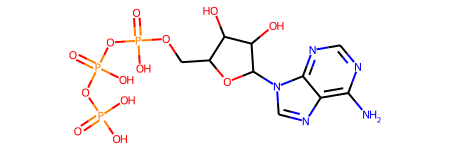

In [6]:
ligand = protein.get_ligand(lig_ids[0])
ligand.fix_bond_order(smiles=smiles)

ligand.draw()

In [7]:
bsite = oph.ComplexBindingSite(protein, ligand)

In [8]:
pharmacophore = oph.LigandReceptorPharmacophore(bsite, ligand)
pharmacophore.extract(feat_types=["aromatic ring"])

In [9]:
print(f"Number of pharmacophoric points {len(pharmacophore[0])}")
for p in pharmacophore[0]:
    print(p)

Number of pharmacophoric points 1
PharmacophoricPoint(feat_type=aromatic ring; center=(38.03, 23.02, 13.08); radius=1.0; direction=(0.14, 0.41, 0.9))


In [10]:
viewer = oph.Viewer()
viewer.add_components([bsite, ligand, pharmacophore[0]])
viewer.set_protein_style("ball+stick")
viewer.show()

NGLWidget()

<img src="../../../../_static/aromatic_interaction.png" alt="pharmacophore">
<div class="alert alert-info">
    <strong>Note:</strong>
    <p>viewer.show() displays an interactive widget. For simplicity an image is presented in the documentation.</p>
</div>

In [11]:
# Save view image so it can be viewed in the documentation
 
import time
import threading

save = False

def save_image(view):
    im = view.render_image()
    while not im.value:
        time.sleep(0.1)
    save_path = "../../../../_static/aromatic_interaction.png"
    with open(save_path, "wb") as fp:
        fp.write(im.value)    

def generate_image():
    thread = threading.Thread(target=save_image, args=(viewer.to_nglview(),), daemon=True)
    thread.start()
    

if save:
    generate_image()